# **Diabetes Prediction Using Machine Learning Approach💊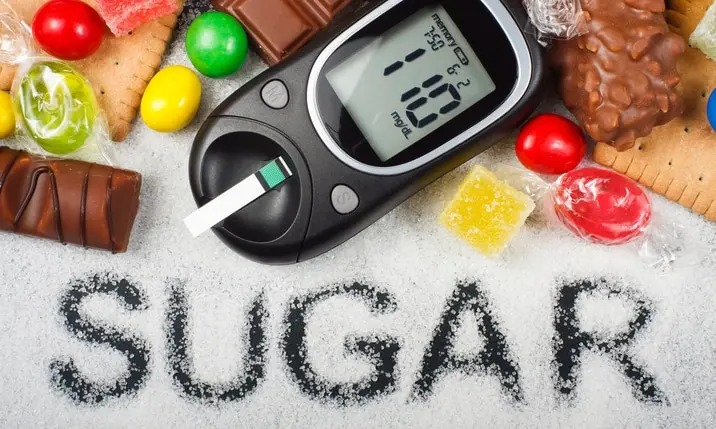**

# **Introduction**

*Diabetes is a disease associated with high levels of glucose in the blood. Diabetes make many kinds of complications, which also leads to a high rate of repeated admission of patients with diabetes. The aim of this project is to develop a system that can perform the prediction of diabetes for a patient by combining the results of different machine learning algorithms. The algorithms like K Nearest Neighbour,SVC,Decision Tree,Logistic Regression, Random Forest, Naive Bayes,AdaBoost and XGBClassifier are used. The accuracy of the model using each of the algorithms is calculated. Then the one with good accuracy
is taken as the model for predicting diabetes.*

# **About Dataset**

* Age : is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-85 in our dataset.

* BMI (Body Mass Index) : is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk.

* Glucose : Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key.

* SkinThickness : Affected area of patients skin can appear thickened, waxy, or edematous.

* BloodPressure : is the pressure of blood pushing against the walls of your arteries. Normal value is between 90/60mmHg and 120/80mmHg.

* Insulin : is a hormone produced by the pancreas that helps regulate blood sugar levels.

* DiabetesPedigreeFunction : uses certain factors or variables to predict the likelihood of someone developing diabetes in the future.

* Pregnancies : it indicates how many times the woman got pregnant. It also had a influence in diabetes.

* Outcome : is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the person is not diabetic.


# **Import Necessary Libraries**

In [337]:
import pandas as pd
import numpy as np
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report,precision_score,recall_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve,auc

# **Load Dataset**

In [338]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [339]:
warnings.filterwarnings('ignore')

# **Chech for Missing Values**

In [340]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **Ensure all the columns are Numeric type**

In [341]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [342]:
df.shape

(768, 9)

In [343]:
#Getting the numerical columns
num_col=df.columns.to_list()
print(num_col)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


# **Data Visualization**

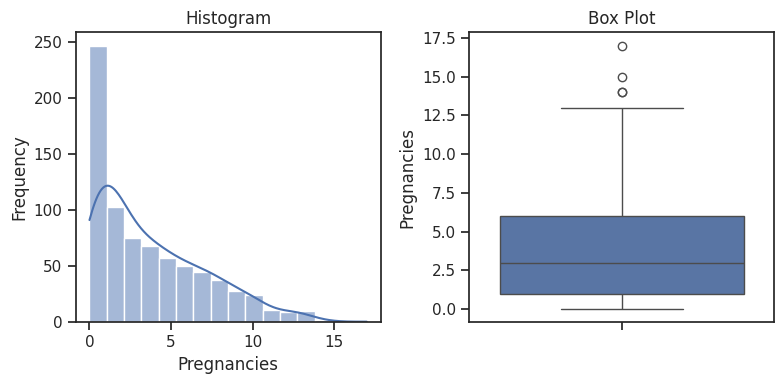

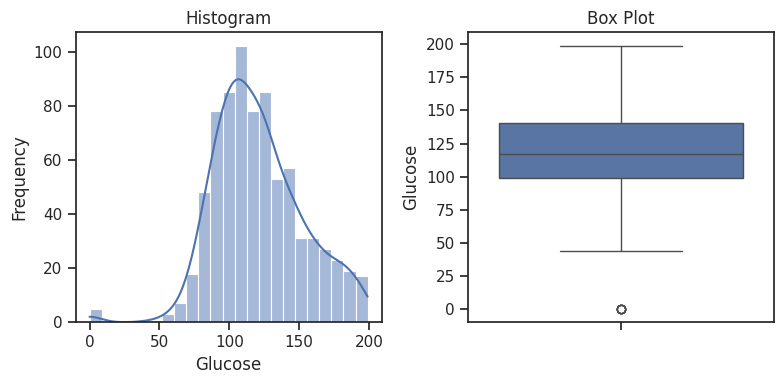

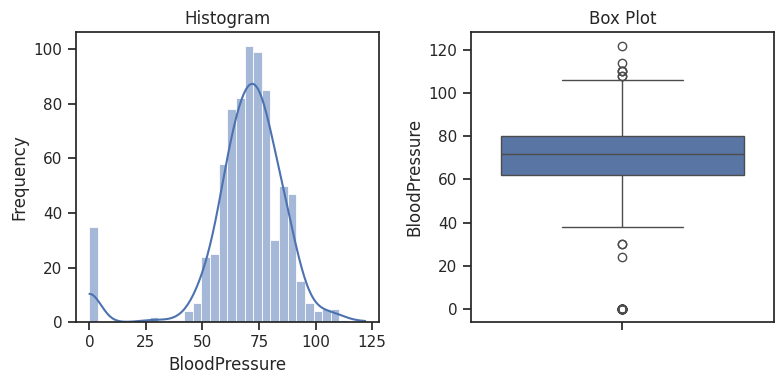

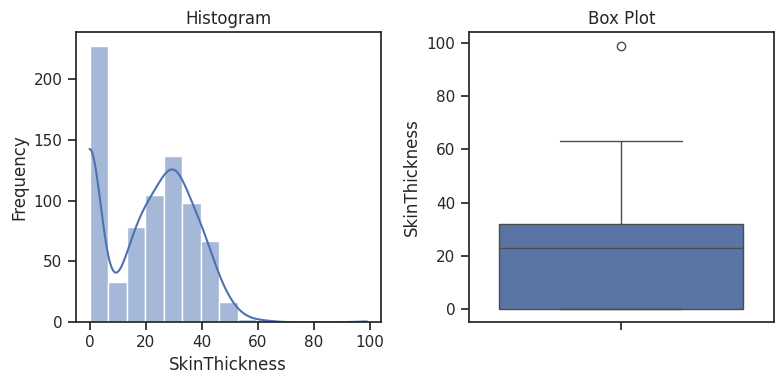

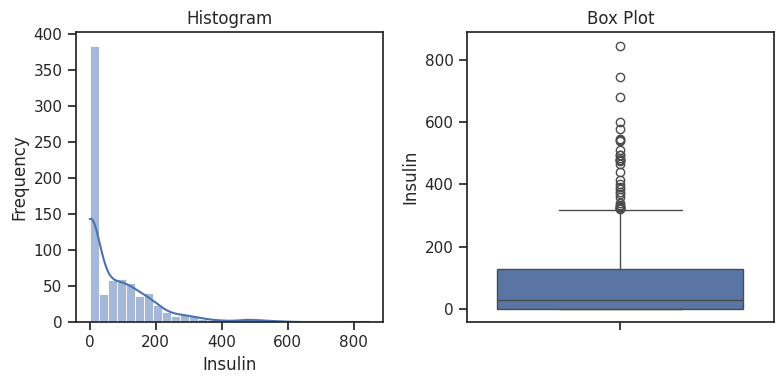

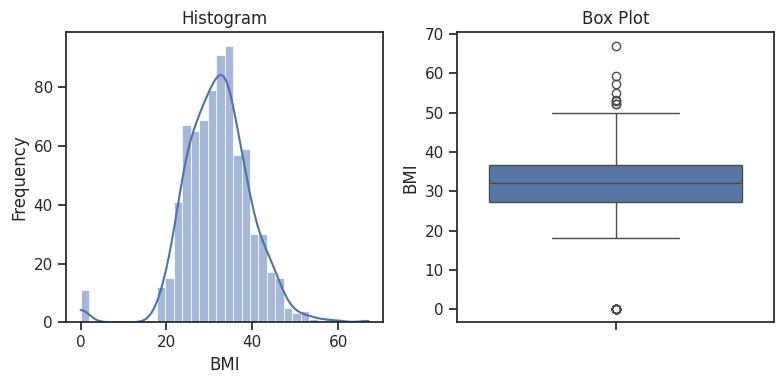

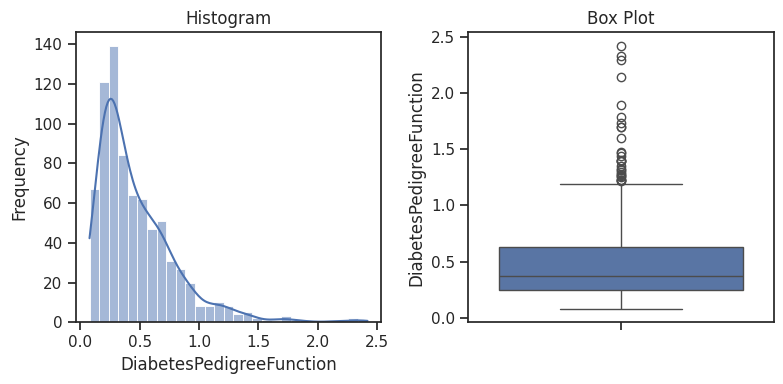

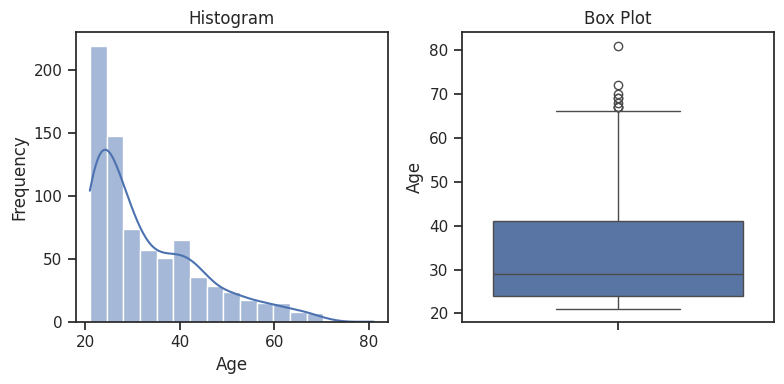

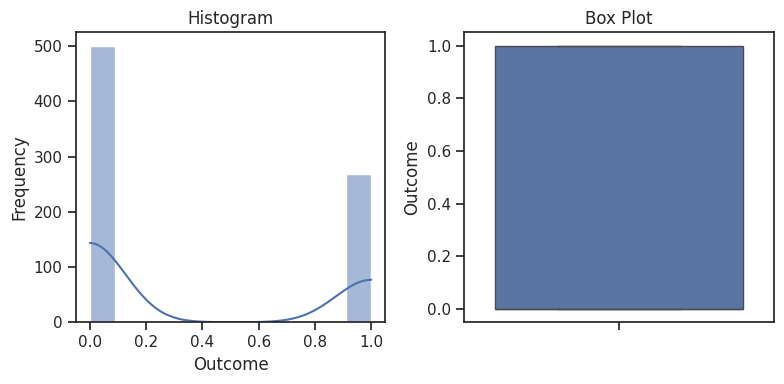

In [344]:
for variable in num_col:

    plt.figure(figsize=(8, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=variable, kde=True)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Histogram")

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=variable)
    plt.ylabel(variable)
    plt.title("Box Plot")

    # Adjust spacing between subplots
    plt.tight_layout()

**There exist Outlier, so we have to remove it.**

In [345]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

In [346]:
print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigr

In [347]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit)
print(lower_limit)

Pregnancies                  13.500
Glucose                     202.125
BloodPressure               107.000
SkinThickness                80.000
Insulin                     318.125
BMI                          50.550
DiabetesPedigreeFunction      1.200
Age                          66.500
Outcome                       2.500
dtype: float64
Pregnancies                  -6.500
Glucose                      37.125
BloodPressure                35.000
SkinThickness               -48.000
Insulin                    -190.875
BMI                          13.350
DiabetesPedigreeFunction     -0.330
Age                          -1.500
Outcome                      -1.500
dtype: float64


In [348]:
df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_new.shape

((768, 9), (639, 9))

Text(0.5, 1.0, 'Comparison of Box Plot')

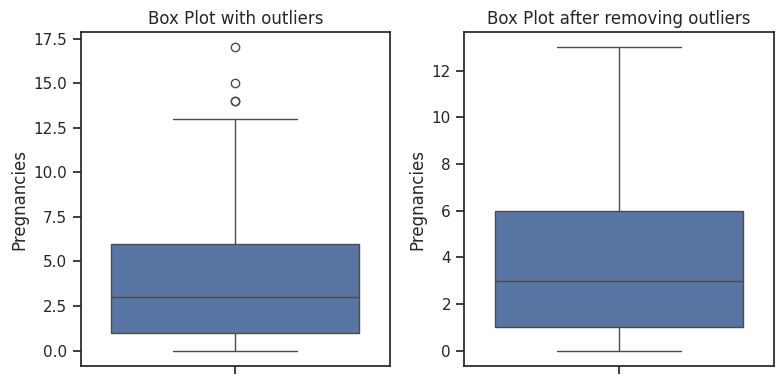

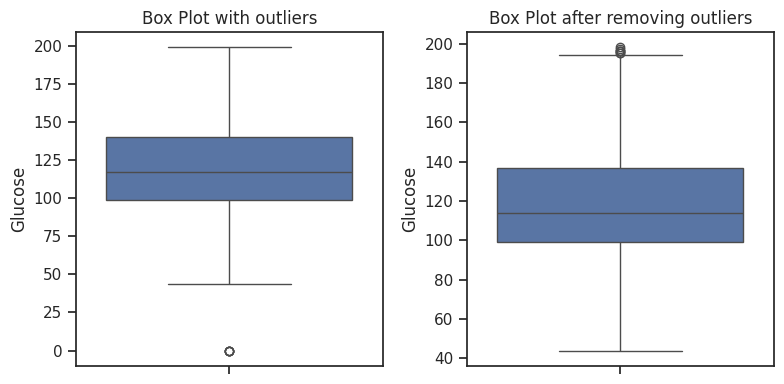

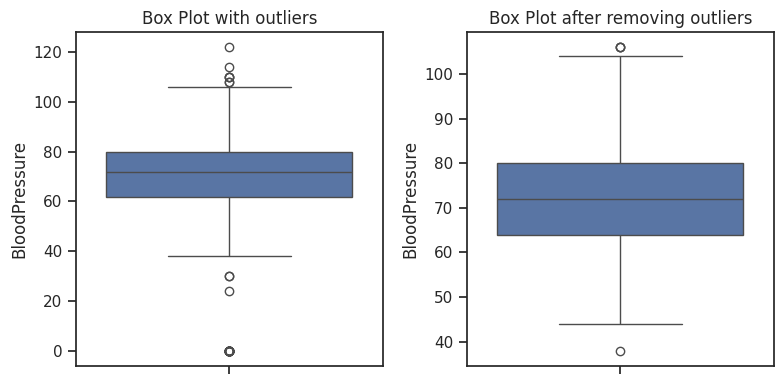

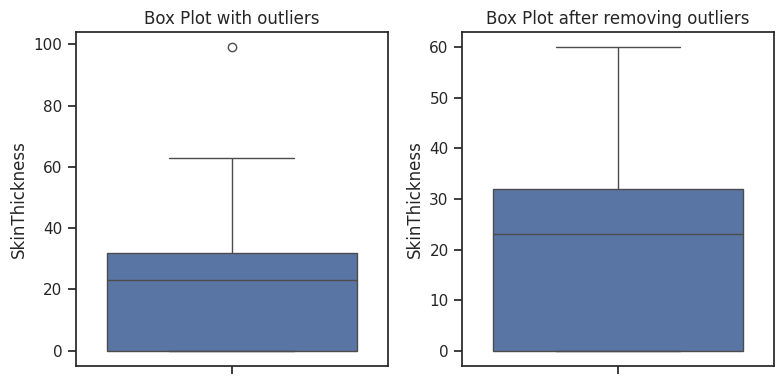

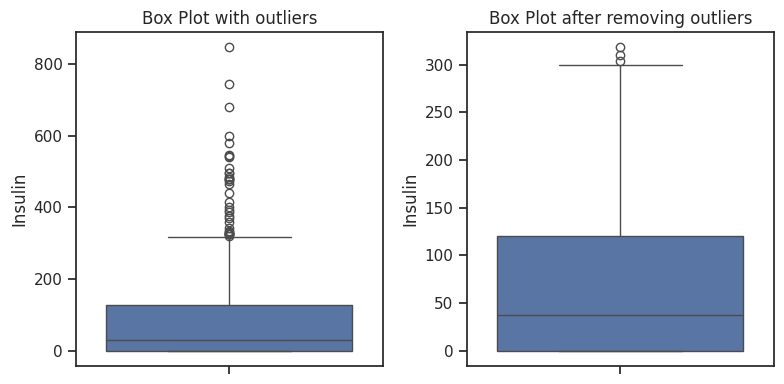

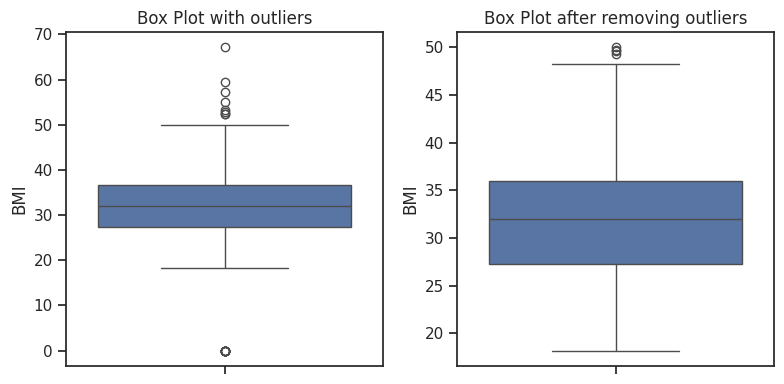

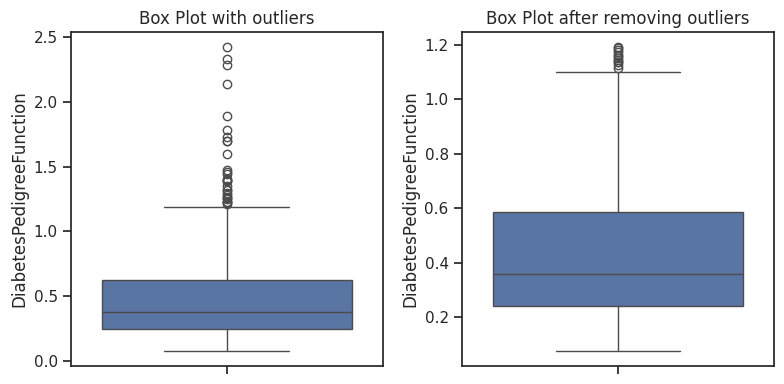

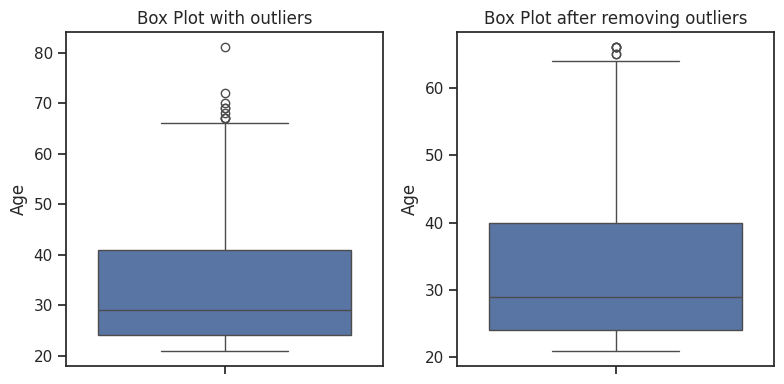

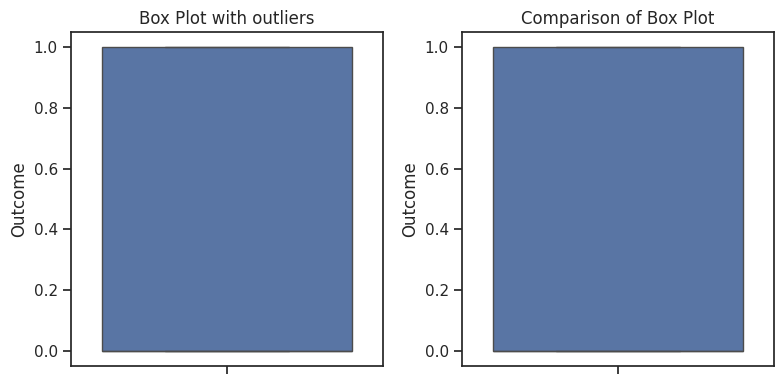

In [385]:
for variable in num_col:

    plt.figure(figsize=(8, 4))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, y=variable)
    plt.ylabel(variable)
    plt.title("Box Plot with outliers")

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_new, y=variable)
    plt.ylabel(variable)
    plt.title("Box Plot after removing outliers")

    # Adjust spacing between subplots
    plt.tight_layout()
plt.title("Comparison of Box Plot")

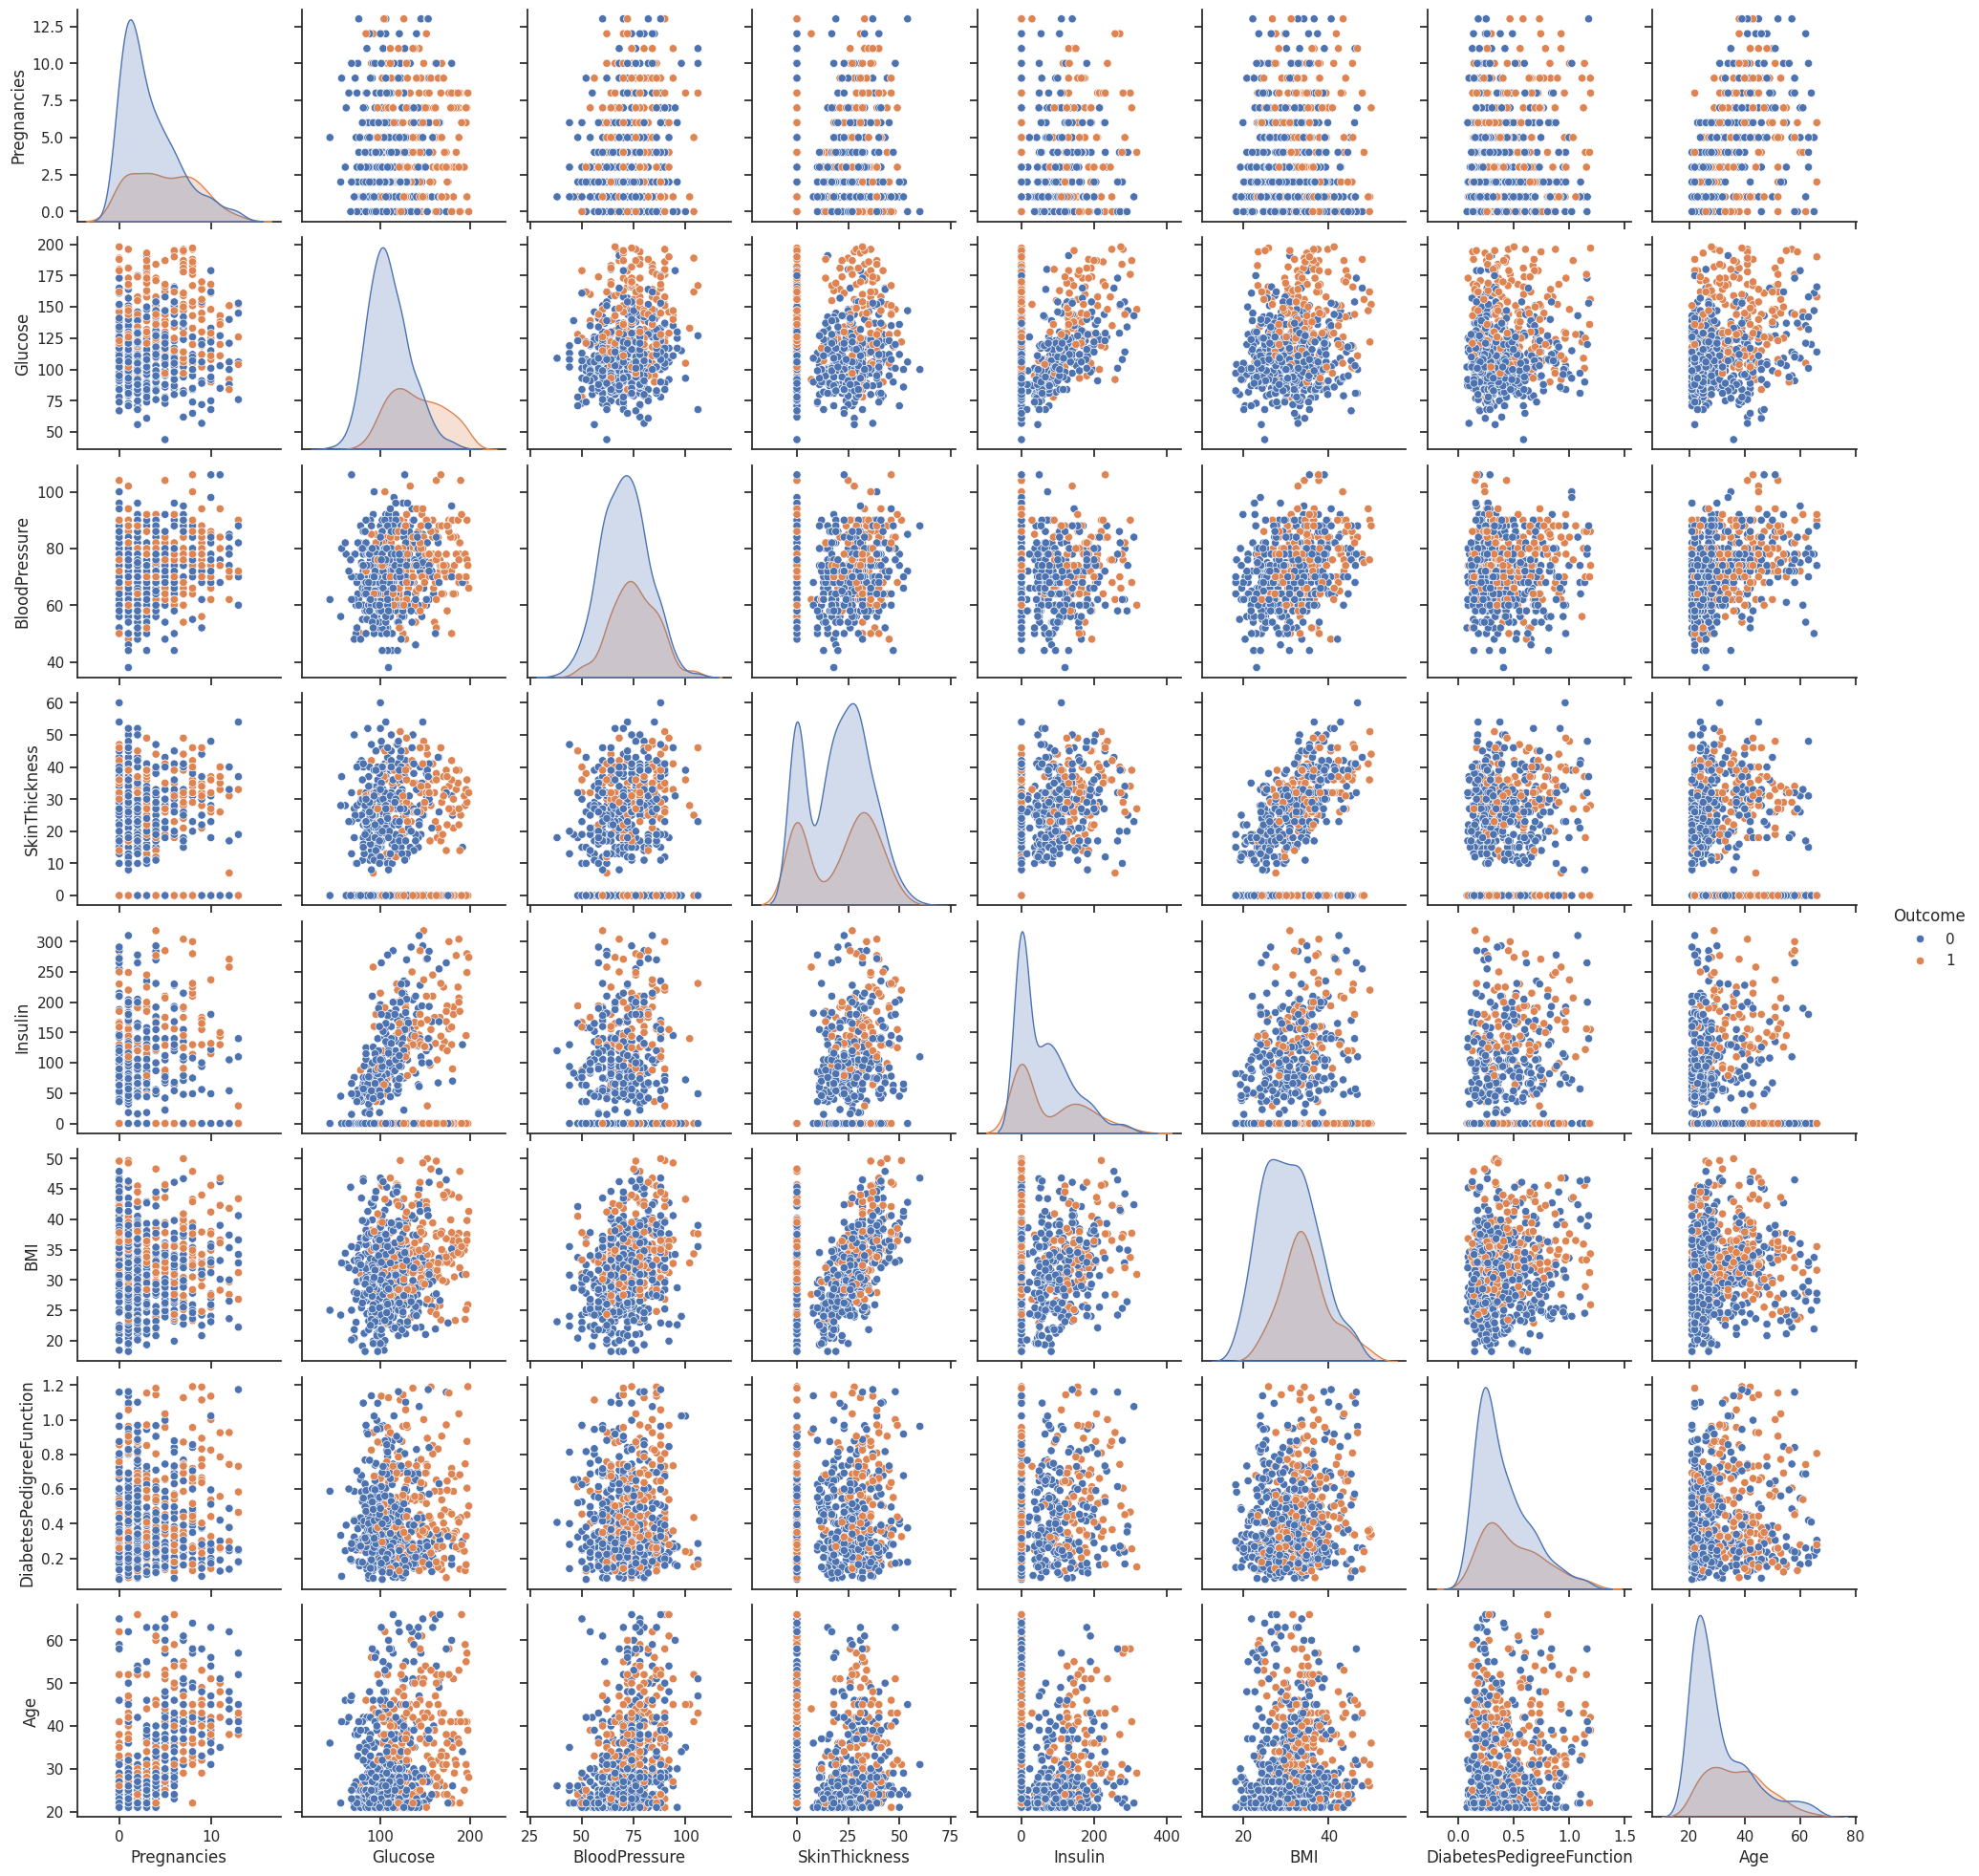

In [350]:
sns.set(style="ticks")
sns.pairplot(df_new, hue="Outcome")

In [351]:
df_new.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
Glucose,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
BloodPressure,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
SkinThickness,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676
Insulin,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
BMI,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
DiabetesPedigreeFunction,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
Age,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
Outcome,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

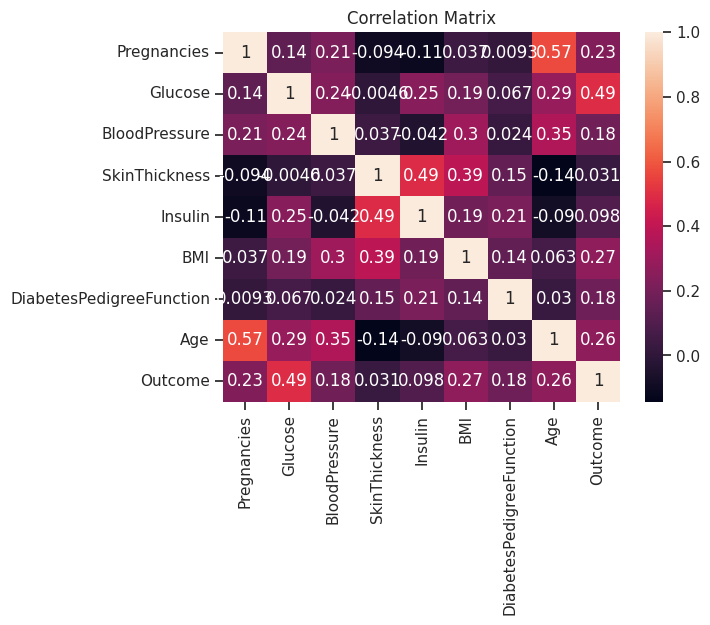

In [352]:
sns.heatmap(df_new.corr(),annot=True)
plt.title('Correlation Matrix')

<Axes: xlabel='count', ylabel='Outcome'>

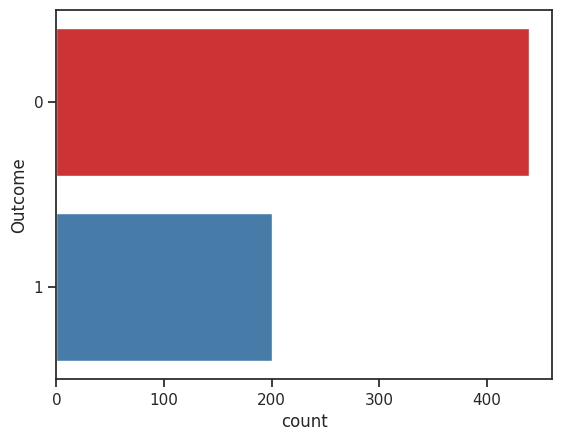

In [353]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df_new['Outcome'],palette='Set1')

# **Seperate Inputs and Output**

In [354]:
df_new.reset_index(drop=True, inplace=True)

In [355]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
634,10,101,76,48,180,32.9,0.171,63,0
635,2,122,70,27,0,36.8,0.340,27,0
636,5,121,72,23,112,26.2,0.245,30,0
637,1,126,60,0,0,30.1,0.349,47,1


In [356]:
X=df_new.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
634,10,101,76,48,180,32.9,0.171,63
635,2,122,70,27,0,36.8,0.340,27
636,5,121,72,23,112,26.2,0.245,30
637,1,126,60,0,0,30.1,0.349,47


In [357]:
y=df_new.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      0
      ..
634    0
635    0
636    0
637    1
638    0
Name: Outcome, Length: 639, dtype: int64

# **Conversion of Imbalanced Data to Balanced Data**

*There is a huge difference between the count of 1s and 0s(outcomes).i.e.It's an Imbalanced Data.*

In [358]:
y.value_counts()

0    439
1    200
Name: Outcome, dtype: int64

In [359]:
#using Oversampling
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [360]:
X_os

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.600000,0.627000,50
1,1,85,66,29,0,26.600000,0.351000,31
2,8,183,64,0,0,23.300000,0.672000,32
3,1,89,66,23,94,28.100000,0.167000,21
4,5,116,74,0,0,25.600000,0.201000,30
...,...,...,...,...,...,...,...,...
873,1,144,77,0,0,40.872764,0.485562,25
874,2,126,70,26,195,32.592368,0.674424,28
875,1,145,81,45,180,45.538368,0.363995,45
876,1,187,76,17,191,33.962838,0.559769,28


In [361]:
y_os

0      1
1      0
2      1
3      0
4      0
      ..
873    1
874    1
875    1
876    1
877    1
Name: Outcome, Length: 878, dtype: int64

In [362]:
y_os.value_counts()

1    439
0    439
Name: Outcome, dtype: int64

# **Scaling using StandardScaler**

In [363]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_os)
X_new

array([[ 0.64913928,  0.75360366, -0.06556231, ...,  0.15894658,
         0.73421142,  1.46464737],
       [-0.94734332, -1.29680622, -0.61118987, ..., -0.98413648,
        -0.38658572, -0.27983695],
       [ 1.28773232,  1.89272025, -0.79306573, ..., -1.52301849,
         0.91695008, -0.18802199],
       ...,
       [-0.94734332,  0.65596509,  0.75287904, ...,  2.1084531 ,
        -0.33381549,  1.00557255],
       [-0.94734332,  2.02290501,  0.2981894 , ...,  0.21819712,
         0.46119472, -0.55528185],
       [-0.94734332,  1.79508169, -0.79306573, ...,  0.19724068,
        -0.44634239,  0.3628678 ]])

# **Train Test Split**

In [364]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_os,test_size=0.3,random_state=1)

In [365]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [366]:
X_test.shape,y_test.shape

((264, 8), (264,))

In [367]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
634,10,101,76,48,180,32.9,0.171,63,0
635,2,122,70,27,0,36.8,0.340,27,0
636,5,121,72,23,112,26.2,0.245,30,0
637,1,126,60,0,0,30.1,0.349,47,1


# **Model Creation**

In [368]:
kn=KNeighborsClassifier()
sv=SVC()
nbs=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
xg=XGBClassifier()
lr=LogisticRegression()
models=[kn,sv,nbs,dt,ad,xg,lr]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.88      0.74      0.81       140
           1       0.75      0.89      0.81       124

    accuracy                           0.81       264
   macro avg       0.82      0.81      0.81       264
weighted avg       0.82      0.81      0.81       264

SVC()
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       140
           1       0.77      0.85      0.81       124

    accuracy                           0.81       264
   macro avg       0.81      0.81      0.81       264
weighted avg       0.81      0.81      0.81       264

GaussianNB()
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       140
           1       0.77      0.76      0.76       124

    accuracy                           0.78       264
   macro avg       0.78      0.78      0.78       264
weighted avg       0.78      0.7

**Logistic Regression, KNeighborsClassifier and SVC have high Accuracies(same).So, build their separate models and find which one has good performance**

In [369]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [370]:
y_pred_lr=lr.predict(X_test)
y_pred_lr

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [371]:
print("Accuracy:",accuracy_score(y_test,y_pred_lr)*100)

Accuracy: 80.68181818181817


In [372]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [373]:
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [374]:
print("Accuracy:",accuracy_score(y_test,y_pred_knn)*100)

Accuracy: 81.06060606060606


In [375]:
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [376]:
y_pred_sv=sv.predict(X_test)
y_pred_sv

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [377]:
print("Accuracy:",accuracy_score(y_test,y_pred_sv)*100)

Accuracy: 81.06060606060606


**We got High accuracy in Support Vector Classifier (SVC)**

# **Performance Measures of SVC**

Accuracy: 81.06060606060606
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       140
           1       0.77      0.85      0.81       124

    accuracy                           0.81       264
   macro avg       0.81      0.81      0.81       264
weighted avg       0.81      0.81      0.81       264



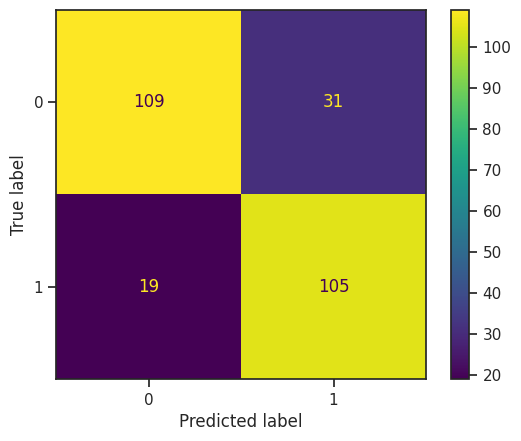

In [378]:
print("Accuracy:",accuracy_score(y_test,y_pred_sv)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))
print(classification_report(y_test,y_pred_sv))

In [379]:
print("Precision:",precision_score(y_test,y_pred_sv))
print("Recall:",recall_score(y_test,y_pred_sv))
print("F1_Score:",f1_score(y_test,y_pred_sv))
print("ROC_AUC_Score:",roc_auc_score(y_test,y_pred_sv))

Precision: 0.7720588235294118
Recall: 0.8467741935483871
F1_Score: 0.8076923076923077
ROC_AUC_Score: 0.8126728110599079


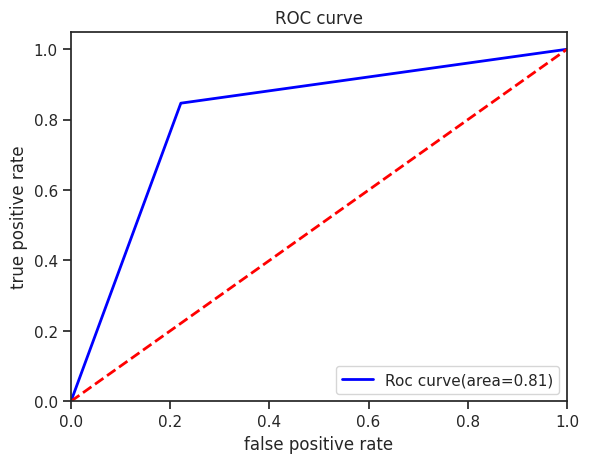

In [380]:
#plot roc auc
fpr_sv,tpr_sv,treshold=roc_curve(y_test,y_pred_sv)
auc_kn=auc(fpr_sv,tpr_sv)
plt.figure()
lw=2
plt.plot(fpr_sv,tpr_sv,color='blue',lw=lw,label='Roc curve(area=%0.2f)' %auc_kn)
plt.plot([0,1],[0,1],color='red',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()
#lw: line width

# **Prediction by a New Value**

In [381]:
y_new=sv.predict(scaler.transform([[8,183,64,0,0,23.3,0.672,32]]))
if y_new.item()==1:
  print("The person is Diabetic")
else:
  print('No Diabetes')

The person is Diabetic


# **Conclusion**

The proposed approach uses various classification and ensemble learning
methods in which KNN, Random Forest, Logistic Regression, Naive Bayes, Decision Tree, AdaBoost, SVC and XGBclassifiers are used. 81 percentage accuracy has been achieved in SVC.
